In [30]:

import json
import rasterio
import numpy as np
import matplotlib.pyplot as plt

def load_image_paths(manifest_paths):
    image_paths = []
    
    for manifest_path in manifest_paths:
        with open(manifest_path, "r") as f:
            manifest_data = json.load(f)
        
        # Extract image file paths (COG GeoTIFFs)
        image_paths.extend([file["path"] for file in manifest_data["files"] if file["media_type"] == "image/tiff"])
    
    return image_paths

# List of manifest files to load
manifest_files = [
    "../data/Satellite_Collections_Raw/Planet/manifest.json",
    "../data/Satellite_Collections_Raw/Planet/manifest (2).json",
    "../data/Satellite_Collections_Raw/Planet/manifest (3).json"
]

# Load the image paths from both manifests
image_path = load_image_paths(manifest_files)

# Print the updated list of image paths
print(f"Found {len(image_path)} image files from both manifests.")
for path in image_path[:5]:  # Show first 5 paths
    print(path)


Found 346 image files from both manifests.
2024-07-22_strip_7458016_composite_udm2_file_format.tif
2024-09-14_strip_7577834_composite_file_format.tif
2024-11-03_strip_7670046_composite_udm2_file_format.tif
2024-07-14_strip_7440291_composite_file_format.tif
2024-08-28_strip_7539117_composite_file_format.tif


In [9]:
# Extract image file paths that do NOT contain "udm2"
non_udm2_images = [file["path"] for file in manifest_data["files"] 
                   if file["media_type"] == "image/tiff" and "udm2" not in file["path"]]

# Print the filtered image paths
print(f"Found {len(non_udm2_images)} non-UDM2 image files.")
for path in non_udm2_images[:5]:  # Show first 5 paths
    print(path)

Found 60 non-UDM2 image files.
2024-09-14_strip_7577834_composite_file_format.tif
2024-07-14_strip_7440291_composite_file_format.tif
2024-08-28_strip_7539117_composite_file_format.tif
2024-10-15_strip_7634786_composite_file_format.tif
2024-06-22_strip_7390070_composite_file_format.tif


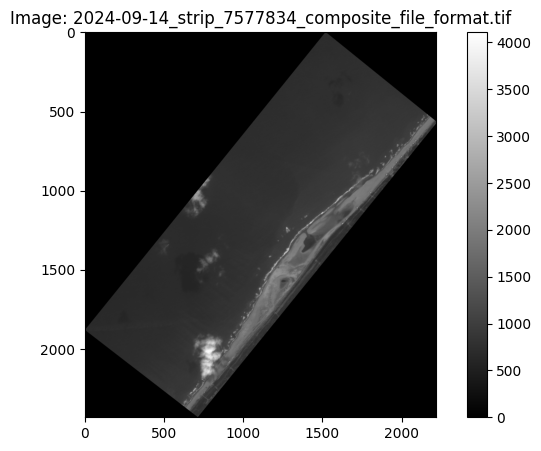

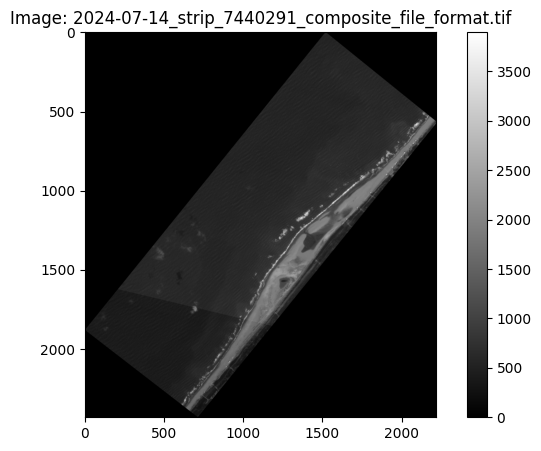

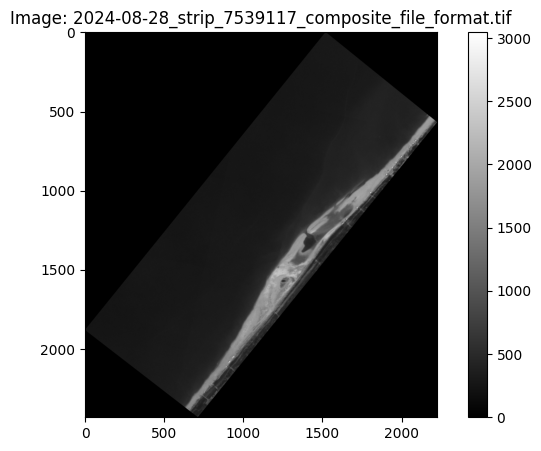

In [11]:
for img_path in non_udm2_images[:3]:  # Load first 3 non-UDM2 images for demonstration
    full_path = f"../data/Satellite_Collections_Raw/Planet/{img_path}"  # Construct full path
    
    try:
        with rasterio.open(full_path) as dataset:
            image = dataset.read(1)  # Read the first band

        # Display the image
        plt.figure(figsize=(8, 5))
        plt.imshow(image, cmap='gray')
        plt.title(f"Image: {img_path}")
        plt.colorbar()
        plt.show()

    except Exception as e:
        print(f"Error loading {img_path}: {e}")

In [46]:
import os
import json
import rasterio
import xarray as xr
import rioxarray as rxr
import numpy as np
import pandas as pd
from datetime import datetime


def load_image_paths(manifest_paths):
    image_paths = []
    
    for manifest_path in manifest_paths:
        with open(manifest_path, "r") as f:
            manifest_data = json.load(f)
        
        # Extract image file paths (COG GeoTIFFs)
        image_paths.extend([file["path"] for file in manifest_data["files"] 
                   if file["media_type"] == "image/tiff" and "udm2" not in file["path"]])
    
    return image_paths

# List of manifest files to load
manifest_files = [
    "../data/Satellite_Collections_Raw/Planet/manifest.json",
    "../data/Satellite_Collections_Raw/Planet/manifest (2).json",
    "../data/Satellite_Collections_Raw/Planet/manifest (3).json"
]

#Load the image paths from both manifests
non_udm2_images = load_image_paths(manifest_files)

# Print the updated list of image paths
print(f"Found {len(non_udm2_images)} image files from both manifests.")
for path in non_udm2_images[:5]:  # Show first 5 paths
    print(path)


# Initialize an empty list for images and metadata
image_list = []
timestamps = []

# Load each image and store in xarray format
for img_path in non_udm2_images:
    full_path = f"../data/Satellite_Collections_Raw/Planet/{img_path}"  # Your working path
    
    try:
        # Read image as xarray
        #img = rxr.open_rasterio(full_path)
        #image_list.append(img)

        # Extract date from filename (Assuming format: YYYY-MM-DD in name)
        date_str = os.path.basename(img_path).split("_")[0]
        timestamps.append(datetime.strptime(date_str, "%Y-%m-%d"))

    except Exception as e:
        print(f"Error loading {img_path}: {e}")

# Create an xarray dataset
#image_collection = xr.concat(image_list, dim="time")
#Just for demonstration, we will use the timestamps list as a placeholder
image_collection = timestamps

print(image_collection)


Found 173 image files from both manifests.
2024-09-14_strip_7577834_composite_file_format.tif
2024-07-14_strip_7440291_composite_file_format.tif
2024-08-28_strip_7539117_composite_file_format.tif
2024-10-15_strip_7634786_composite_file_format.tif
2024-06-22_strip_7390070_composite_file_format.tif
[datetime.datetime(2024, 9, 14, 0, 0), datetime.datetime(2024, 7, 14, 0, 0), datetime.datetime(2024, 8, 28, 0, 0), datetime.datetime(2024, 10, 15, 0, 0), datetime.datetime(2024, 6, 22, 0, 0), datetime.datetime(2024, 10, 3, 0, 0), datetime.datetime(2024, 9, 2, 0, 0), datetime.datetime(2024, 9, 2, 0, 0), datetime.datetime(2024, 6, 29, 0, 0), datetime.datetime(2024, 11, 17, 0, 0), datetime.datetime(2024, 12, 1, 0, 0), datetime.datetime(2024, 7, 8, 0, 0), datetime.datetime(2024, 9, 5, 0, 0), datetime.datetime(2024, 7, 8, 0, 0), datetime.datetime(2024, 8, 5, 0, 0), datetime.datetime(2024, 8, 8, 0, 0), datetime.datetime(2024, 9, 5, 0, 0), datetime.datetime(2024, 6, 9, 0, 0), datetime.datetime(2024, 

In [45]:
import matplotlib.pyplot as plt

image_collection = image_collection.sortby("time")  # Sort images by time
# Select first 3 images
for i in range(3):
    img = image_collection.isel(time=i)  # Select image at index i
    
    # Plot only the first band (adjust if needed)
    plt.figure(figsize=(8, 5))
    plt.imshow(img.sel(band=1), cmap='gray')
    plt.title(f"Image {i+1} - Date: {img.time.values}")
    plt.colorbar(label="Pixel Value")
    plt.show()


AttributeError: 'list' object has no attribute 'sortby'

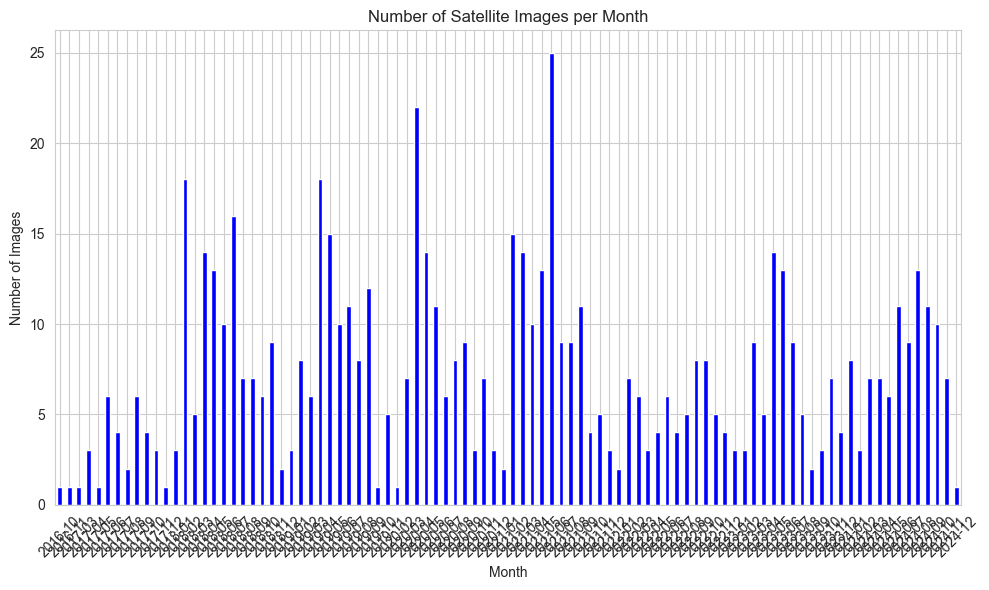

In [52]:
import os
import json
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd

def load_image_paths(manifest_paths):
    image_paths = []
    
    for manifest_path in manifest_paths:
        with open(manifest_path, "r") as f:
            manifest_data = json.load(f)
        
        # Extract image file paths (COG GeoTIFFs)
        image_paths.extend([file["path"] for file in manifest_data["files"] 
                   if file["media_type"] == "image/tiff" and "udm2" not in file["path"]])
    
    return image_paths

# List of manifest files to load
manifest_files = [
    "../data/Satellite_Collections_Raw/Planet/manifest.json",
    "../data/Satellite_Collections_Raw/Planet/manifest (2).json",
    "../data/Satellite_Collections_Raw/Planet/manifest (3).json",
    "../data/Satellite_Collections_Raw/Planet/manifest (4).json",
    "../data/Satellite_Collections_Raw/Planet/manifest (5).json",
    "../data/Satellite_Collections_Raw/Planet/manifest (6).json",
    "../data/Satellite_Collections_Raw/Planet/manifest (7).json",
    "../data/Satellite_Collections_Raw/Planet/manifest (8).json",
    "../data/Satellite_Collections_Raw/Planet/manifest (9).json",
    "../data/Satellite_Collections_Raw/Planet/manifest (10).json",
    "../data/Satellite_Collections_Raw/Planet/manifest (11).json",
    "../data/Satellite_Collections_Raw/Planet/manifest (12).json",
    "../data/Satellite_Collections_Raw/Planet/manifest (13).json",
    "../data/Satellite_Collections_Raw/Planet/manifest (14).json",

]

# Load the image paths from both manifests
non_udm2_images = load_image_paths(manifest_files)

# Extract timestamps from filenames
timestamps = []
for img_path in non_udm2_images:
    try:
        # Extract date from filename (assuming format: YYYY-MM-DD in name)
        date_str = os.path.basename(img_path).split("_")[0]
        timestamps.append(datetime.strptime(date_str, "%Y-%m-%d"))
    except Exception as e:
        print(f"Error processing {img_path}: {e}")

# Convert timestamps to pandas Datetime
timestamps = pd.to_datetime(timestamps)

#Export the timestamps to a CSV file
timestamps_df = timestamps.to_frame(name='timestamp')
timestamps_df.to_csv("../data/Satellite_Collections_Raw/image_timestamps.csv", index=False)

# Group by the month and count the number of images per month
monthly_counts = timestamps.to_series().dt.to_period('M').value_counts().sort_index()

# Plot the counts
plt.figure(figsize=(10, 6))
monthly_counts.plot(kind='bar', color='b')
plt.xlabel("Month")
plt.ylabel("Number of Images")
plt.title("Number of Satellite Images per Month")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


In [38]:

# Get number of images
image_count = len(image_collection.time)

# Extract dates and compute time intervals
dates = sorted(image_collection.time.values)
time_intervals = [(dates[i] - dates[i-1]).astype('timedelta64[D]').item().days for i in range(1, len(dates))]
average_interval = sum(time_intervals) / len(time_intervals) if time_intervals else 0

# Print statistics
print(f'Number of images: {image_count}')
print(f'Start date: {pd.to_datetime(dates[0])}')
print(f'End date: {pd.to_datetime(dates[-1])}')
print(f'Average time interval between images: {average_interval:.2f} days')

Number of images: 60
Start date: 2024-06-09 00:00:00
End date: 2024-12-01 00:00:00
Average time interval between images: 2.97 days


Coverage of first image: 40.26%


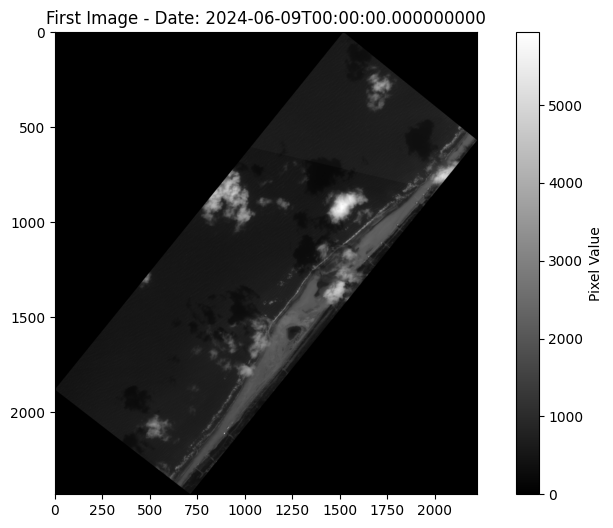

In [25]:
# Select the first image
first_image = image_collection.isel(time=0)

# Compute coverage (percentage of non-zero pixels)
valid_pixels = np.count_nonzero(first_image.values)
total_pixels = np.prod(first_image.shape)

coverage = (valid_pixels / total_pixels) * 100
print(f'Coverage of first image: {coverage:.2f}%')


# Select first image and plot the first band
plt.figure(figsize=(10, 6))
plt.imshow(first_image.sel(band=1), cmap='gray')
plt.colorbar(label="Pixel Value")
plt.title(f"First Image - Date: {first_image.time.values}")
plt.show()


  month_year  count
0    2024-06      9
1    2024-07      9
2    2024-08     13
3    2024-09     11
4    2024-10     10

Time Series Statistics:
Total number of images: 60
Time period: 2024-06 to 2024-12
Maximum images in one month: 13
Average images per month: 8.57



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


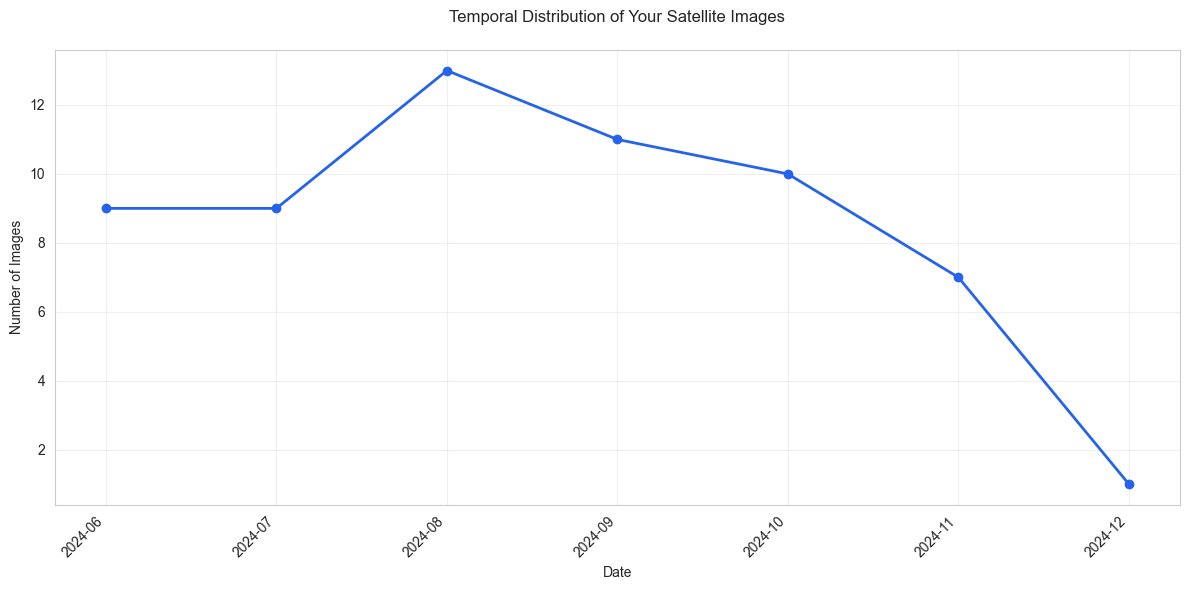

In [35]:
!pip install seaborn
import seaborn as sns

def prepare_timeseries(image_collection):
    """
    Prepare a time series dataset for satellite image acquisitions.
    
    Parameters:
    image_collection: xarray dataset containing a 'time' dimension
    
    Returns:
    pandas DataFrame with monthly counts of images
    """
    # Extract dates from xarray dataset
    dates = pd.to_datetime(image_collection.time.values)

    # Convert to DataFrame
    df = pd.DataFrame({'date': dates})

    # Create month-year column for grouping
    df['month_year'] = df['date'].dt.to_period('M')

    # Count images per month
    monthly_counts = df.groupby('month_year').size().reset_index(name='count')

    # Convert period to string for plotting
    monthly_counts['month_year'] = monthly_counts['month_year'].astype(str)

    return monthly_counts

# Process the time series data
timeseries_data = prepare_timeseries(image_collection)
print(timeseries_data.head())

def plot_image_timeseries(timeseries_data, title="Temporal Distribution of Satellite Images"):
    """
    Create a time series plot of satellite image acquisitions.
    
    Parameters:
    timeseries_data: pandas DataFrame with 'month_year' and 'count' columns
    title: Title of the plot
    """
    plt.figure(figsize=(12, 6))
    sns.set_style("whitegrid")

    # Plot the line
    plt.plot(timeseries_data['month_year'], timeseries_data['count'], 
             marker='o', linestyle='-', linewidth=2, markersize=6, color='#2563eb')

    # Customize the plot
    plt.title(title, fontsize=12, pad=20)
    plt.xlabel('Date', fontsize=10)
    plt.ylabel('Number of Images', fontsize=10)
    
    # Set x-axis ticks and labels
    plt.xticks(range(len(timeseries_data)), timeseries_data['month_year'], rotation=45, ha='right')
    
    # Add grid
    plt.grid(True, alpha=0.3)
    
    # Adjust layout
    plt.tight_layout()
    
    # Print statistics
    print("\nTime Series Statistics:")
    print(f"Total number of images: {timeseries_data['count'].sum()}")
    print(f"Time period: {timeseries_data['month_year'].min()} to {timeseries_data['month_year'].max()}")
    print(f"Maximum images in one month: {timeseries_data['count'].max()}")
    print(f"Average images per month: {timeseries_data['count'].mean():.2f}")

    return plt

# Create and show the plot
plot = plot_image_timeseries(timeseries_data, title="Temporal Distribution of Your Satellite Images")
plt.show()
